In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import resample

%matplotlib inline

In [4]:
#Loading the dataset
df = pd.read_csv('./input/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Now lets look at the value counts to check how imbalance data sets are

0    0.998273
1    0.001727
Name: Class, dtype: float64


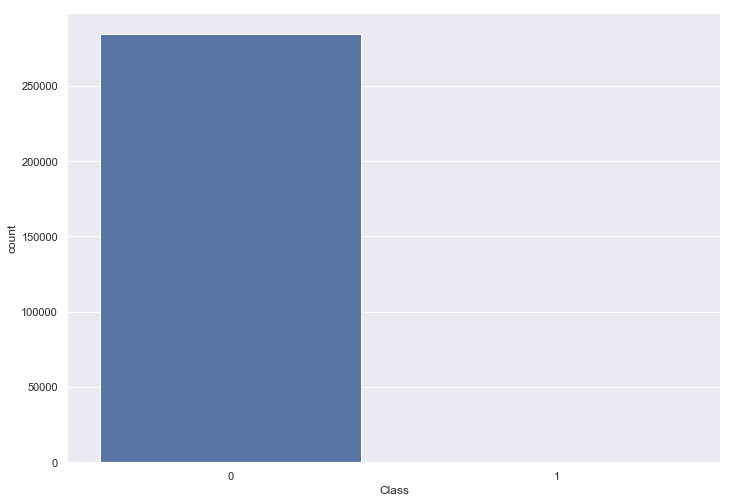

In [5]:
print(df['Class'].value_counts(normalize=True))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Class', data=df)

In [6]:
time_delta = pd.to_timedelta(df['Time'], unit='s')
df['time_in_min'] = (time_delta.dt.components.minutes).astype(int)
df['time_in_hour'] = (time_delta.dt.components.hours).astype(int)

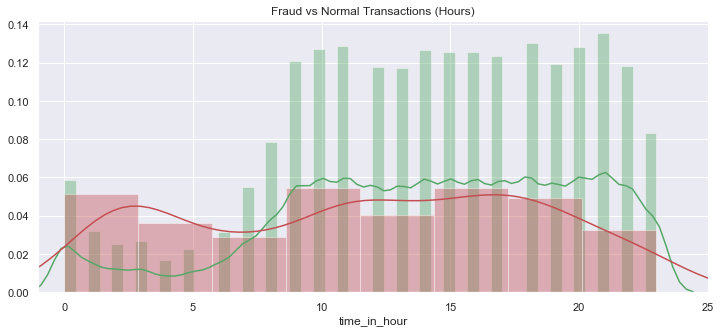

In [7]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["time_in_hour"], color='g')
sns.distplot(df[df['Class'] == 1]["time_in_hour"], color='r')
plt.title('Fraud vs Normal Transactions (Hours)')
plt.xlim([-1,25])
plt.show()

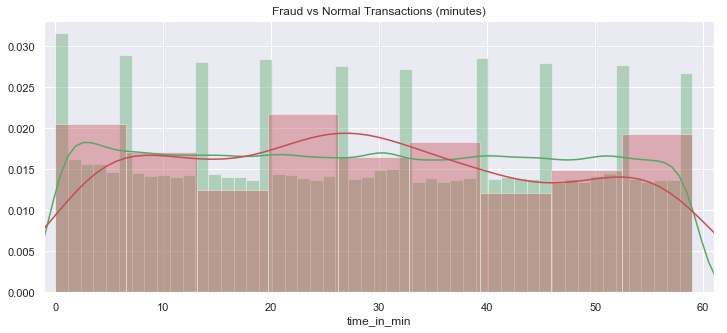

In [8]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["time_in_min"], color='g')
sns.distplot(df[df['Class'] == 1]["time_in_min"], color='r')
plt.title('Fraud vs Normal Transactions (minutes)')
plt.xlim([-1,61])
plt.show()
# Now we can drop the time_in_min and time_in_hour columns

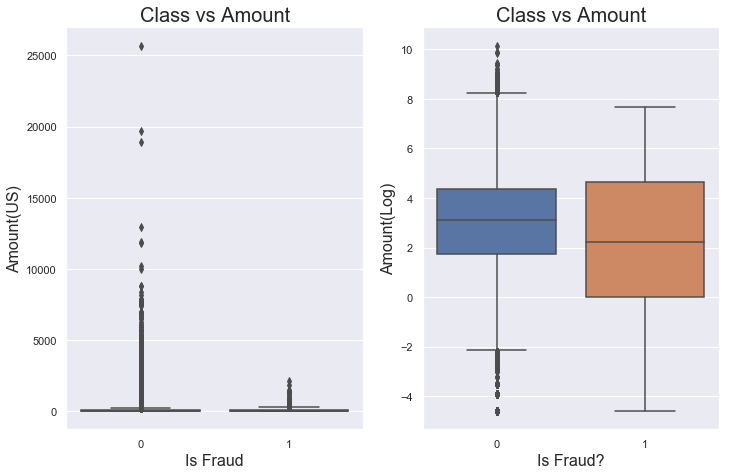

In [9]:
df['log_amount'] = np.log(df.Amount + 0.01)
plt.subplot(121)
ax = sns.boxplot(x="Class", y="Amount", data=df)
ax.set_title("Class vs Amount", fontsize=20)
ax.set_xlabel("Is Fraud", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="log_amount", data=df)
ax1.set_title("Class vs Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

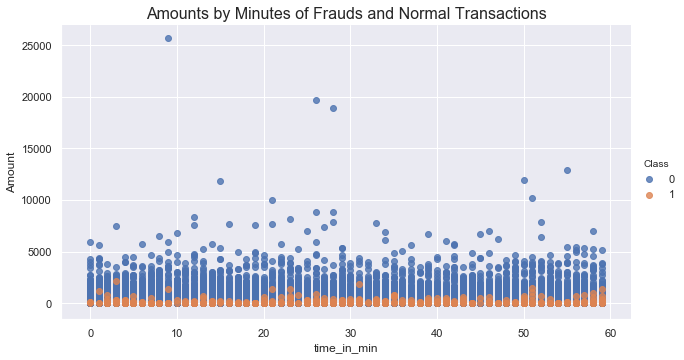

In [10]:
ax = sns.lmplot(y="Amount", x="time_in_min", fit_reg=False, aspect=1.8, data=df, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

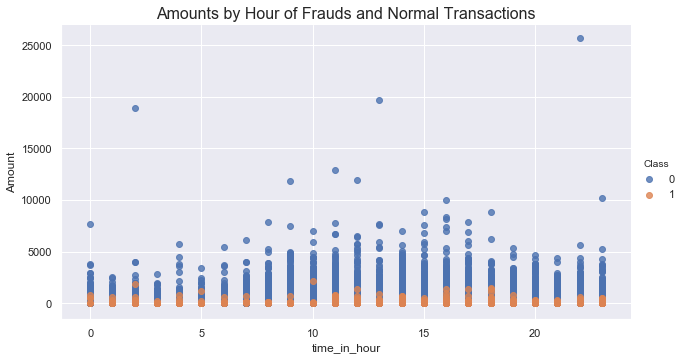

In [11]:
ax = sns.lmplot(y="Amount", x="time_in_hour", fit_reg=False, aspect=1.8, data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)
plt.show()

Text(0, 0.5, 'Num of transactions')

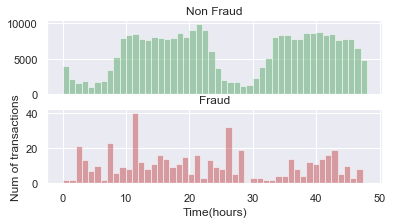

In [12]:
# Lets check if there is any trend between trends Fraud/Non Fraud transactions vs Time (Hour)
df["time_in_hr"] = df["Time"] / 3600 
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.time_in_hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Non Fraud')
ax2.hist(df.time_in_hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time(hours)')
plt.ylabel('Num of transactions')

Text(0, 0.5, 'Num of transactions')

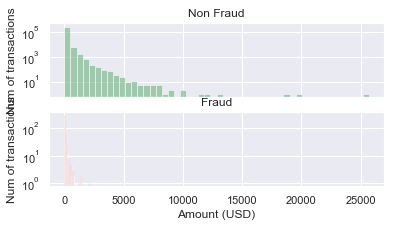

In [13]:
# Lets also check if there is any trend between trends Fraud/Non Fraud transactions vs Amount (USD)
#let us check another feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Non Fraud') # to see the tails
ax3.set_ylabel('Num of transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount (USD)')
ax4.set_ylabel('Num of transactions')

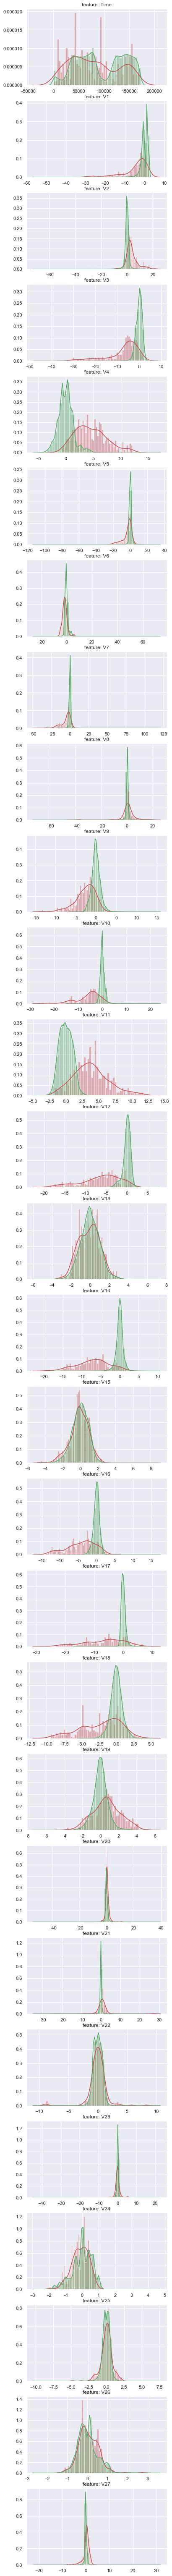

In [14]:
# Let us check if there are any correlations among those 25 Vx principal components.
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

0    0.998273
1    0.001727
Name: Class, dtype: float64
0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, '')

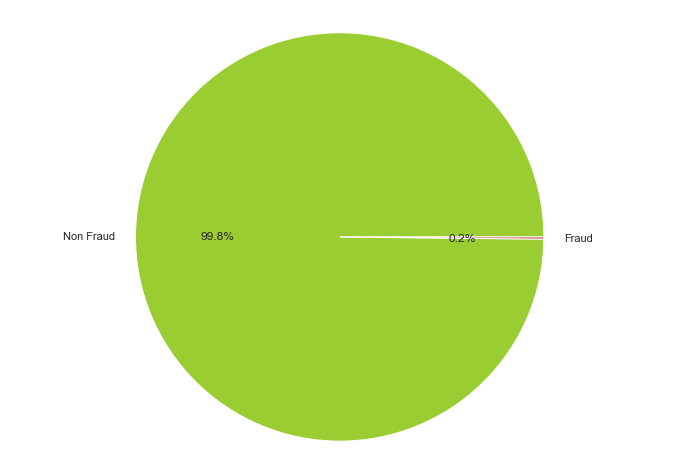

In [15]:
# Now lets look at the value counts to check how imbalance data sets are
print(df['Class'].value_counts(normalize=True))
# So we can see that the data is heavily skewed.
# We have 99.8% Non-fraud data and only 0.0017 percent of Fraud data
print(df['Class'].value_counts())
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
# So we have only 492 fraud samples
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Non Fraud','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

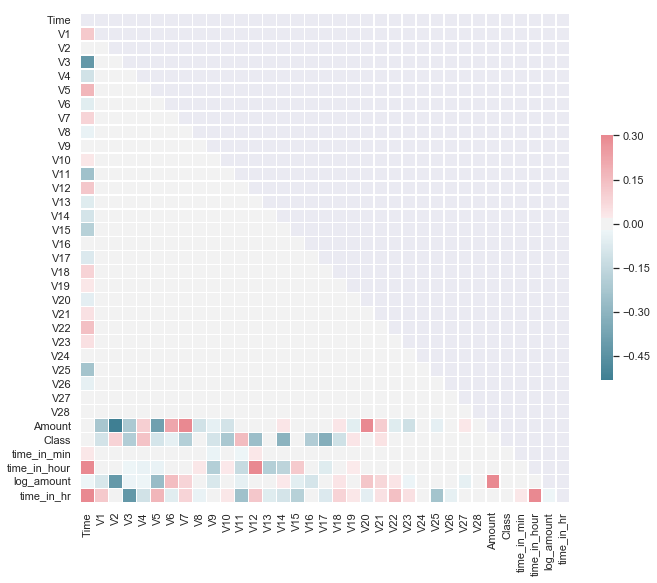

In [17]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})